## Importing Libraries

In [1]:
!pip install --upgrade networkx

In [2]:
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

## Functions

In [3]:
def create_graph_plot(G, title = None) :
    plt.figure(figsize=(12, 12))
    pos = nx.spring_layout(G)  # positions for all nodes
    # Draw the nodes
    nx.draw(G, with_labels=True,font_weight='bold')
    if title:
        plt.title("Network Graph of Media Outlets")
    plt.show()


In [4]:
def create_undirected_graph(n, p = 0.5, seed = None):
    G = nx.Graph()
    G.add_nodes_from(range(n))
    random.seed(seed)
    for i in range(n):
        for j in range(i+1,n):
            if random.random() < p :
                G.add_edge(i,j)
    return G

In [5]:
def calculate_graph_metrics(G, sortby = None):
    density = nx.density(G)
    degree_centrality = nx.degree_centrality(G)
    betweenness_centrality = nx.betweenness_centrality(G)
    closeness_centrality = nx.closeness_centrality(G)
    pagerank = nx.pagerank(G)
    df = pd.DataFrame({
        'Degree Centrality': pd.Series(degree_centrality),
        'Betweenness Centrality': pd.Series(betweenness_centrality),
        'Closeness Centrality': pd.Series(closeness_centrality),
        'PageRank': pd.Series(pagerank)
    })
    df['Network Density'] = density
    if sortby in df.columns:
        df = df.sort_values(by = sortby, ascending=False)
    return df

In [11]:
def visualize_graph_plot_with_metrics(G, df):
    fig, ax = plt.subplots(figsize = (12,12))
    pos = nx.spring_layout(G)
    node_sizes = [df.loc[node, 'Degree Centrality'] * 1000 for node in G.nodes()]
    node_colors = [df.loc[node, 'Betweenness Centrality'] for node in G.nodes()]
    norm = plt.Normalize(vmin = min(node_colors), vmax = max(node_colors))
    node_colors_normalized = [norm(color) for color in node_colors]
    
    nx.draw(G, 
            pos, 
            with_labels = True, 
            font_weight = 'bold', 
            node_size = node_sizes, 
            node_color = node_colors_normalized)
    sm = plt.cm.ScalarMappable(cmap = 'coolwarm', norm = norm)
    sm.set_array([])
    plt.colorbar(sm, ax = ax)
    plt.show

## Main

In [7]:
n = 20
p = 0.2
seed = 50
G = create_undirected_graph(n, p, seed)

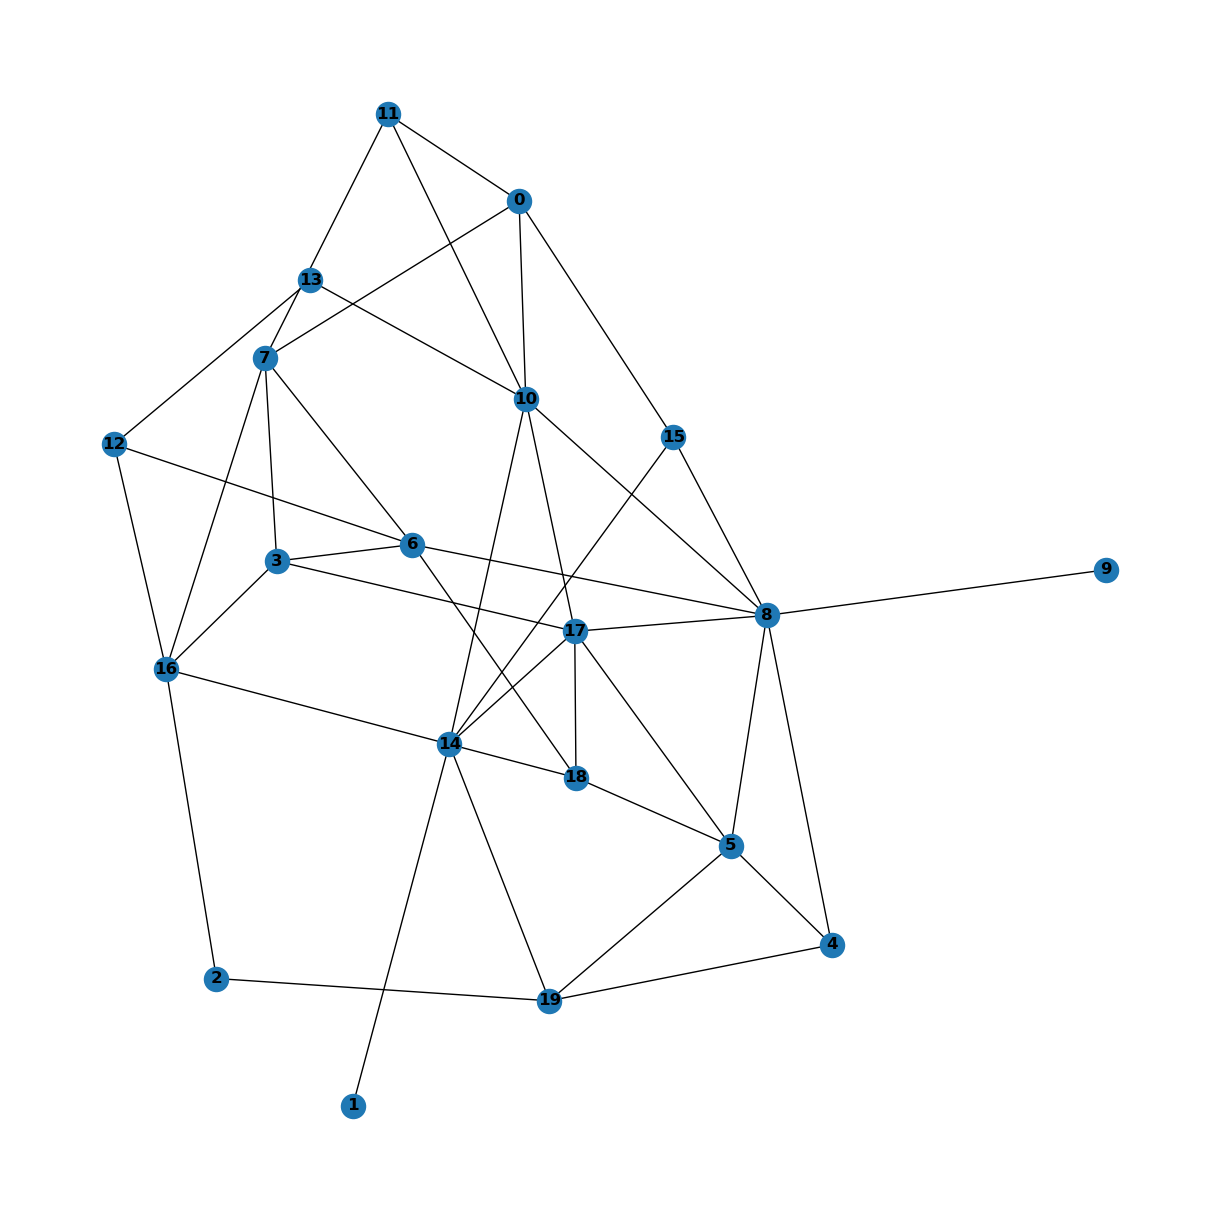

In [8]:
create_graph_plot(G)

In [9]:
metrics = calculate_graph_metrics(G)
metrics

,Degree Centrality,Betweenness Centrality,Closeness Centrality,PageRank,Network Density
0,0.210526,0.021150,0.452381,0.049712,0.210526
1,0.052632,0.000000,0.380000,0.017848,0.210526
2,0.105263,0.014327,0.395833,0.028960,0.210526
3,0.210526,0.024492,0.475000,0.048198,0.210526
4,0.157895,0.013158,0.441860,0.038852,0.210526
5,0.263158,0.039961,0.475000,0.059664,0.210526
6,0.263158,0.101699,0.527778,0.059944,0.210526
7,0.263158,0.064731,0.487179,0.059940,0.210526
8,0.368421,0.214815,0.558824,0.084872,0.210526
9,0.052632,0.000000,0.365385,0.017806,0.210526


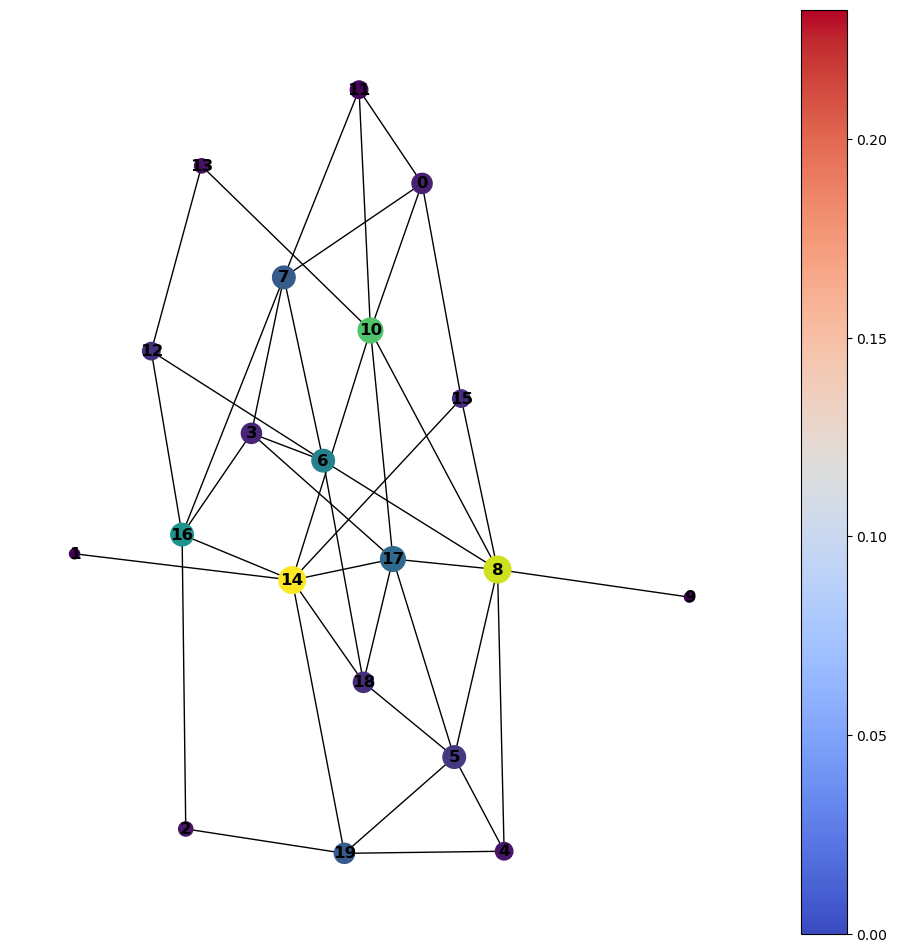

In [12]:
visualize_graph_plot_with_metrics(G, metrics)

## Part 2

In [13]:
df = pd.read_csv('networkAnalysis.csv')

In [15]:
Graph2 = nx.Graph()
edges = list(zip(df['from_media'], df['to_media']))
Graph2.add_edges_from(edges)

In [16]:
num_of_nodes = Graph2.number_of_nodes()
num_of_edges = Graph2.number_of_edges()
num_of_nodes, num_of_edges

(17, 38)

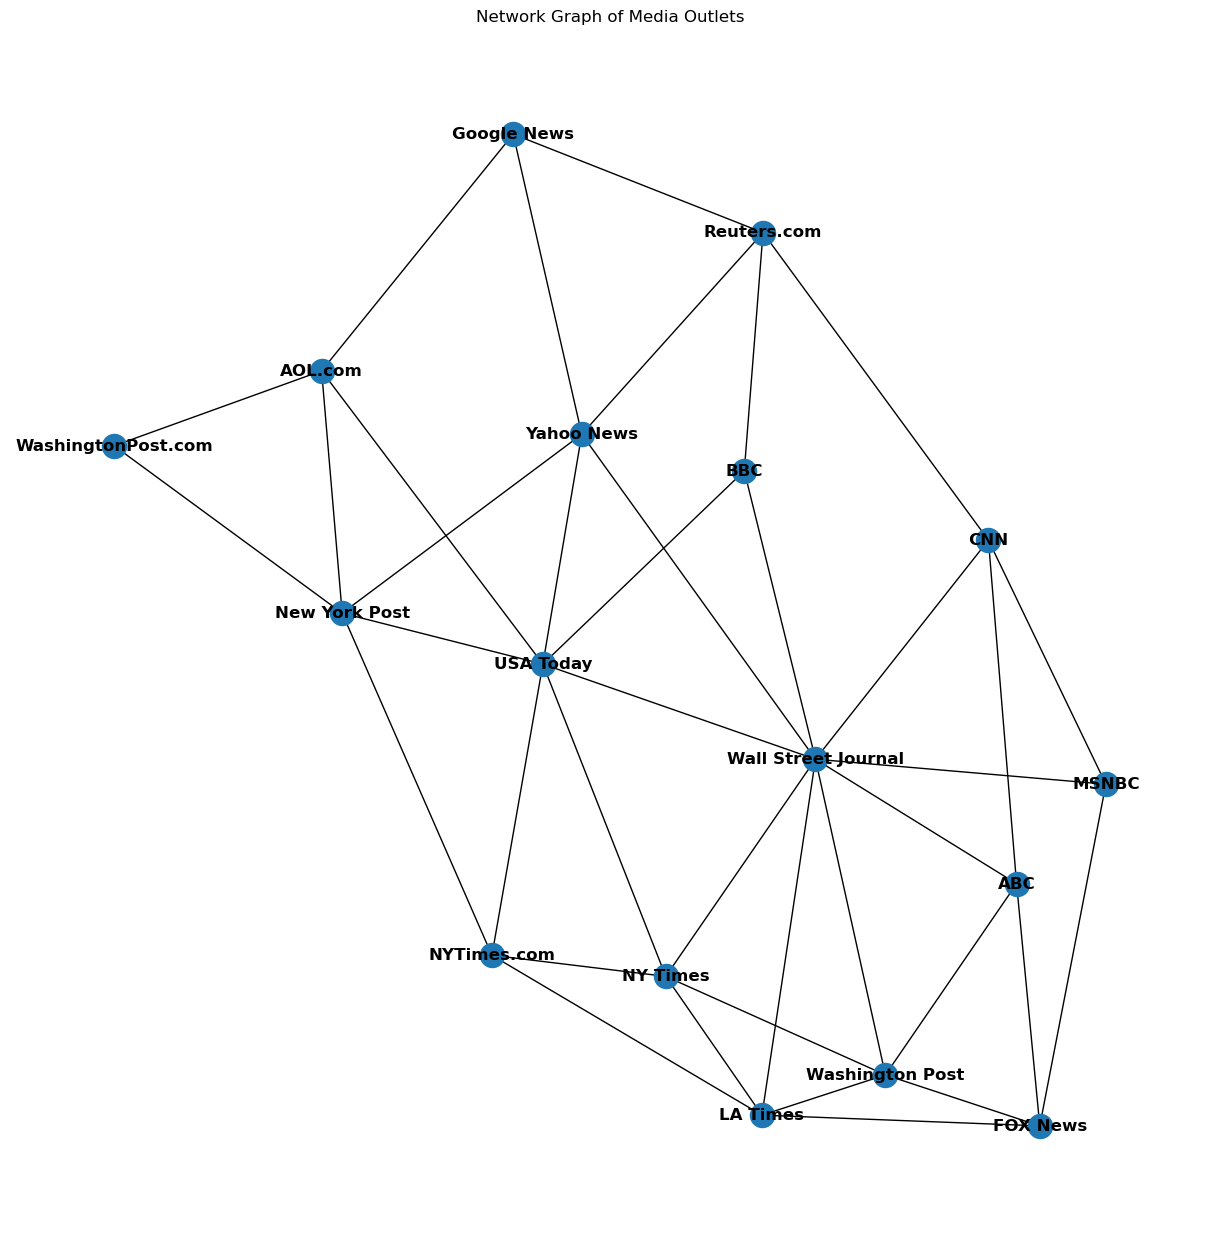

In [17]:
create_graph_plot(Graph2, title='Network Graph of Media Outlets')

In [18]:
metrics2 = calculate_graph_metrics(Graph2, sortby = 'PageRank')
metrics2

,Degree Centrality,Betweenness Centrality,Closeness Centrality,PageRank,Network Density
Wall Street Journal,0.5625,0.340417,0.666667,0.108593,0.279412
USA Today,0.4375,0.195665,0.615385,0.087176,0.279412
New York Post,0.3125,0.100188,0.500000,0.067515,0.279412
Yahoo News,0.3125,0.122718,0.571429,0.065388,0.279412
Washington Post,0.3125,0.025992,0.484848,0.062723,0.279412
LA Times,0.3125,0.065456,0.516129,0.062650,0.279412
NY Times,0.3125,0.039147,0.533333,0.062046,0.279412
AOL.com,0.2500,0.052937,0.457143,0.057107,0.279412
Reuters.com,0.2500,0.049167,0.470588,0.055577,0.279412
CNN,0.2500,0.050278,0.484848,0.053893,0.279412


In [19]:
calculate_graph_metrics(Graph2,sortby = 'Closeness Centrality')

,Degree Centrality,Betweenness Centrality,Closeness Centrality,PageRank,Network Density
Wall Street Journal,0.5625,0.340417,0.666667,0.108593,0.279412
USA Today,0.4375,0.195665,0.615385,0.087176,0.279412
Yahoo News,0.3125,0.122718,0.571429,0.065388,0.279412
NY Times,0.3125,0.039147,0.533333,0.062046,0.279412
BBC,0.1875,0.017917,0.516129,0.041476,0.279412
LA Times,0.3125,0.065456,0.516129,0.062650,0.279412
New York Post,0.3125,0.100188,0.500000,0.067515,0.279412
NYTimes.com,0.2500,0.056210,0.484848,0.052085,0.279412
Washington Post,0.3125,0.025992,0.484848,0.062723,0.279412
CNN,0.2500,0.050278,0.484848,0.053893,0.279412


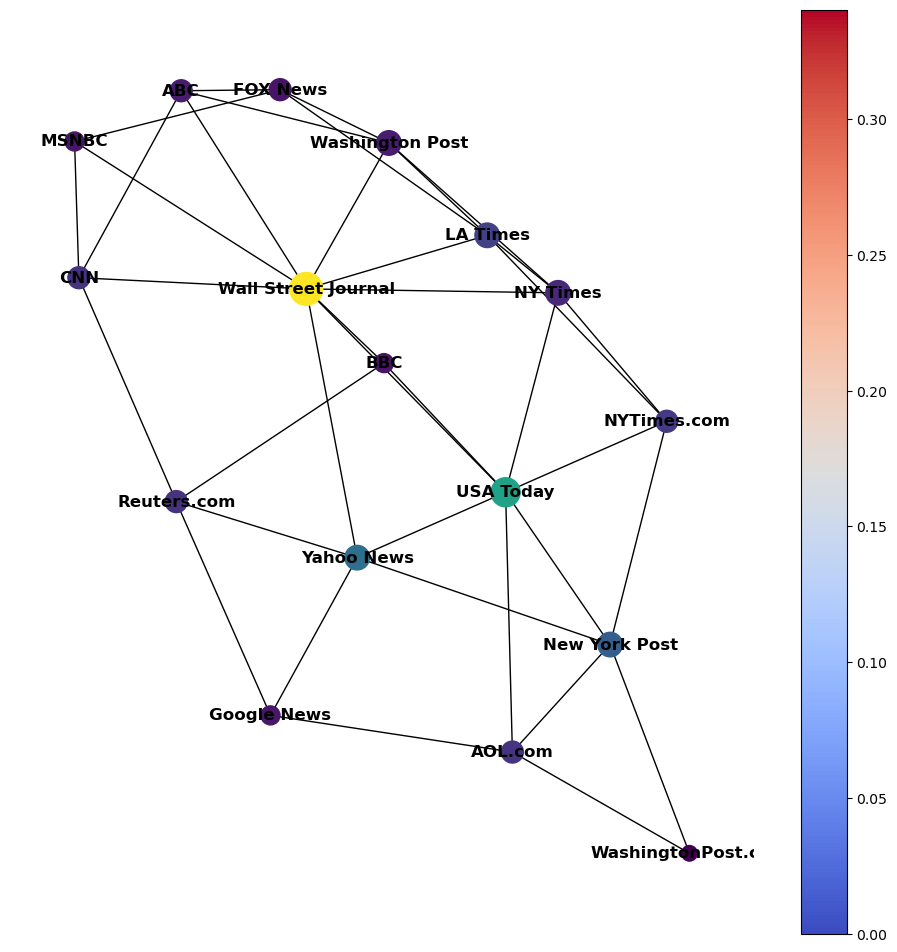

In [20]:
visualize_graph_plot_with_metrics(Graph2, metrics2)